<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/XMatch_With_GAIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Libraries 

In [ ]:
!pip install mpl-scatter-density

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.5/655.5 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 KB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 885.7/885.7 KB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.2 MB/s eta 0:00:00


In [ ]:
!pip install isochrones

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 KB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 KB 431.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for isochrones: filename=isochrones-2.1-py3-none-any.whl size=93782 sha256=45c1a63200976852307da6df5bc0d10fab670005550b9e205eb853701761617e
  Stored in directory: /root/.cache/pip/wheels/a1/3b/ef/6c475626f751b30cc195cd997b8030e079e0643e869c060e47
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=959e113cda1f95301f8d05003ccd29bc69a987c8931ce9d497f0b0465b3d6d8e
  Stored in directory: /root/.cache/pip/wheels/a3/d7/75/19cd0d2a893cad4bb0b2b16dd572ad2916d19c0d5ee9612511
Successfully built isochrones asciitree


# Libraries

In [75]:
%matplotlib inline

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

# Gaia DR3 Data

By using a query presented in the article, I add data here. All filters mentioned in section 2 are applied by conditions that were added to the SQL script. Although I tried hard to select more stars, I could not select more than 80,000 stars.



In [ ]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

In [ ]:
from astroquery.gaia import Gaia
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]
external.external.apassdr9
external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
external.external.gaiaedr3_distance
external.external.gaiaedr3_gcns_main_1
external.external.gaiaedr3_gcns_rejected_1
external.external.gaiaedr3_spurious
external.external.galex_ais
external.external.ravedr5_com
external.external.ravedr5_dr5
external.external.ravedr5_gra
external.external.ravedr5_on
external.external.ravedr6
external.external.sdssdr13_photoprimary
external.external.skymapperdr1_master
external.external.skymapperdr2_master
external.external.tmass_xsc
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighb

In [ ]:
%%time
job = Gaia.launch_job_async("SELECT TOP 80000 phot_g_mean_mag+5*log10(parallax)-10 AS mg , bp_rp , ra AS RA , dec AS DEC FROM gaiadr2.gaia_source  \
WHERE parallax_over_error > 1 \
AND RA > 296.1875 \
AND RA < 296.4375 \
AND DEC > -14.9611 \
AND DEC < -14.6333", dump_to_file=True) 

print (job)

Jobid: 1674513290482O
Phase: COMPLETED
Owner: None
Output file: 1674513290482O-result.vot.gz
Results: None
CPU times: user 51.5 ms, sys: 2.56 ms, total: 54.1 ms
Wall time: 2.43 s


In [76]:
Gaia_data = job.get_results()

In [108]:
Gaia_data = pd.DataFrame(np.array(Gaia_data))

In [109]:
Gaia_data

,mg,bp_rp,ra,dec
0,3.920422,1.276014,296.410878,-14.833771
1,7.886960,1.203894,296.374093,-14.959368
2,14.317942,1.617682,296.318690,-14.946077
3,10.210256,1.383366,296.258318,-14.943007
4,11.276020,1.983170,296.316301,-14.858846
...,...,...,...,...
2125,12.014278,1.314299,296.284151,-14.811884
2126,10.495947,1.561312,296.314319,-14.704460
2127,12.235181,1.195160,296.306520,-14.810013
2128,11.758909,2.128437,296.335717,-14.761291


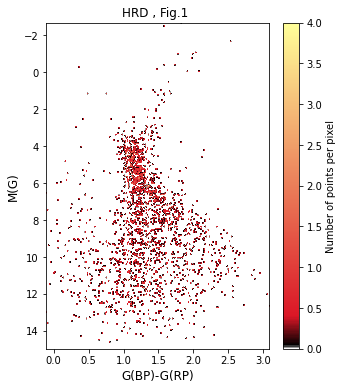

In [110]:
import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap

# "Hot" colormap with white background
hot = LinearSegmentedColormap.from_list('hot', [
    (0, '#ffffff'),
    (0.01, '#000000'),
    (0.1, '#db1626'),
    (1, '#FFFF99'),
], N=256,)

def using_mpl_scatter_density(fig, x, y):
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    fig.set_size_inches(5,6)
    density = ax.scatter_density(x, y, cmap = hot)
    fig.colorbar(density, label='Number of points per pixel')

fig = plt.figure()
X = Gaia_data['bp_rp']
Y = Gaia_data['mg']
using_mpl_scatter_density(fig, X , Y )
plt.title("HRD , Fig.1 " ,fontsize = 12 )
plt.ylabel('M(G)' , fontsize = 12 )
plt.xlabel('G(BP)-G(RP)', fontsize = 12 )
plt.gca().invert_yaxis()
plt.savefig('HRD_Fig_1' , dpi=300)
plt.show()

# NGC6822 Data

In [72]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 131 (delta 9), reused 3 (delta 3), pack-reused 106
Receiving objects: 100% (131/131), 2.19 MiB | 6.61 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [79]:
NGC6822_data = pd.read_csv("/content/NGC_6822/Data/final_cleaned_data.csv")
NGC6822_data

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,1,10870.0,296.178920,-14.822860,17.520,0.04,16.530,0.04,16.190,0.05,S
1,2,10784.0,296.215450,-14.834690,17.450,0.03,16.530,0.04,16.200,0.06,S
2,3,11004.0,296.273410,-14.808610,17.600,0.03,16.620,0.03,16.270,0.05,S
3,4,11029.0,296.283080,-14.804970,17.460,0.03,16.550,0.02,16.220,0.05,S
4,5,12050.0,296.254270,-14.817640,18.170,0.07,17.250,0.10,16.700,0.05,S
...,...,...,...,...,...,...,...,...,...,...,...
380,381,NaN,296.003693,-14.974893,18.392,NaN,17.560,NaN,17.210,NaN,C
381,382,NaN,297.181274,-14.445981,18.530,NaN,18.264,NaN,17.292,NaN,C
382,383,NaN,297.108337,-14.493650,18.191,NaN,17.383,NaN,16.661,NaN,C
383,384,NaN,297.013916,-14.348797,18.201,NaN,17.552,NaN,16.944,NaN,C


#X_Match

##Final data with spitzer

In [111]:
Main_cat = NGC6822_data
Scnd_cat = Gaia_data 

In [112]:
Main_cat

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types
0,1,10870.0,296.178920,-14.822860,17.520,0.04,16.530,0.04,16.190,0.05,S
1,2,10784.0,296.215450,-14.834690,17.450,0.03,16.530,0.04,16.200,0.06,S
2,3,11004.0,296.273410,-14.808610,17.600,0.03,16.620,0.03,16.270,0.05,S
3,4,11029.0,296.283080,-14.804970,17.460,0.03,16.550,0.02,16.220,0.05,S
4,5,12050.0,296.254270,-14.817640,18.170,0.07,17.250,0.10,16.700,0.05,S
...,...,...,...,...,...,...,...,...,...,...,...
380,381,NaN,296.003693,-14.974893,18.392,NaN,17.560,NaN,17.210,NaN,C
381,382,NaN,297.181274,-14.445981,18.530,NaN,18.264,NaN,17.292,NaN,C
382,383,NaN,297.108337,-14.493650,18.191,NaN,17.383,NaN,16.661,NaN,C
383,384,NaN,297.013916,-14.348797,18.201,NaN,17.552,NaN,16.944,NaN,C


In [113]:
Scnd_cat

,mg,bp_rp,ra,dec
0,3.920422,1.276014,296.410878,-14.833771
1,7.886960,1.203894,296.374093,-14.959368
2,14.317942,1.617682,296.318690,-14.946077
3,10.210256,1.383366,296.258318,-14.943007
4,11.276020,1.983170,296.316301,-14.858846
...,...,...,...,...
2125,12.014278,1.314299,296.284151,-14.811884
2126,10.495947,1.561312,296.314319,-14.704460
2127,12.235181,1.195160,296.306520,-14.810013
2128,11.758909,2.128437,296.335717,-14.761291


In [114]:
Main_cat_Coord = SkyCoord(Main_cat['Ra(J2000) deg'], Main_cat['Dec(J2000) deg'], unit=(u.deg, u.deg))
Scnd_cat_Coord = SkyCoord(Scnd_cat['ra'], Scnd_cat['dec'], unit=(u.deg, u.deg))

In [115]:
idx, d2D, d3D = Scnd_cat_Coord.match_to_catalog_sky(Main_cat_Coord)

In [116]:
max_sep = 1.0 * u.arcsec        # Maximum erorr
i_OK = d2D < max_sep

In [117]:
Secondary_catalog = Scnd_cat[i_OK]
Main_catalog = Main_cat.iloc[idx[i_OK]]

Making CSV file 

In [119]:
Secondary_catalog.to_csv(r'Secondary_catalog.csv', header=True, index=None, sep='\t', mode='w')
Main_catalog.to_csv(r'Main_catalog.csv', header=True, index=None, sep='\t', mode='w')

In [120]:
with open("Main_catalog.csv") as f1, open("Secondary_catalog.csv") as f2, open("X_Catalog.csv", "w") as f3:
     for x, y in zip(f1, f2):
          f3.write(x.strip() + '\t' + y.strip() + '\n')
f1.close()
f2.close()
f3.close()

In [121]:
X_data = pd.read_csv ("X_Catalog.csv", sep = '\t')
X_data

,Mid,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,eJ,H,eH,Ks,eKs,Types,mg,bp_rp,ra,dec
0,117,NaN,296.436554,-14.743853,17.450,NaN,16.680,NaN,16.560,NaN,C,12.976950,1.136112,296.436586,-14.743899
1,362,NaN,296.309265,-14.868592,17.326,NaN,16.568,NaN,16.129,NaN,C,10.348543,1.314293,296.309272,-14.868613
2,339,NaN,296.261536,-14.769683,17.345,NaN,16.483,NaN,16.072,NaN,C,12.568937,1.105915,296.261530,-14.769717
3,169,NaN,296.233093,-14.830748,17.390,NaN,16.600,NaN,16.310,NaN,C,13.187813,NaN,296.233094,-14.830786
4,115,NaN,296.350922,-14.720666,17.050,NaN,16.130,NaN,15.750,NaN,C,11.838456,1.726221,296.351116,-14.720665
5,99,NaN,296.310880,-14.736450,17.180,NaN,16.310,NaN,15.910,NaN,C,13.606907,1.996576,296.310916,-14.736502
6,157,NaN,296.352264,-14.780713,17.090,NaN,16.300,NaN,15.760,NaN,C,13.520836,1.231665,296.352341,-14.780623
7,247,NaN,296.382667,-14.752194,17.150,NaN,NaN,NaN,15.626,NaN,C,11.554066,2.020359,296.382686,-14.752225
8,163,NaN,296.274109,-14.800164,17.570,NaN,16.750,NaN,16.400,NaN,C,11.482271,1.599663,296.274114,-14.800199
9,109,NaN,296.259827,-14.684196,17.310,NaN,16.470,NaN,16.210,NaN,C,10.716317,1.981558,296.259837,-14.684194
